# 🏗️ Model Evaluation

In [47]:
import pandas as pd
import pickle
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

import sys
sys.path.append(r'E:\USW\Project\car_insurance_claim_prediction\src')

import os
os.chdir(r'E:\USW\Project\car_insurance_claim_prediction\notebooks')

import importlib
import model_evaluation as me
import model_selection as ms

# Reload if the module was modified
importlib.reload(me)
importlib.reload(ms)

<module 'model_selection' from 'E:\\USW\\Project\\car_insurance_claim_prediction\\src\\model_selection.py'>

## 1. ⏳ Load Data & Model

In [ ]:

# Load Data
df = pd.read_csv("../data/processed/cleaned_train_data.csv")
model = me.load_pickle_model("../models/XGBoost_model.pkl")
selected_features = ms.load_selected_features('../outputs/mi_features.csv')
print(f"Loaded selected features: {selected_features}")

# Split into features and target
X = df[selected_features]
y = df['is_claim']  # Replace with your actual target column

# Optional: Use train_test_split if needed
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Loaded selected features: ['transmission_type', 'is_front_fog_lights', 'is_day_night_rear_view_mirror', 'is_central_locking', 'is_power_steering', 'steering_type', 'is_brake_assist', 'is_speed_alert', 'is_driver_seat_height_adjustable', 'is_adjustable_steering', 'rear_brakes_type', 'is_parking_sensors', 'is_power_door_locks', 'cylinder', 'is_ecw', 'policy_tenure', 'area_cluster', 'population_density', 'age_of_car', 'age_of_policyholder']


## 2. 🔬 Cross Validation

In [49]:
cv_scores = me.perform_cross_validation(model, X_train, y_train)

Cross-validation F1 scores (macro): [0.77816677 0.7213987  0.7138196  0.71952471 0.71245754]
Average F1-score: 0.7291


## 3. 🧬Evaluate on Validation set

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9885    0.7107    0.8269     16417
         1.0     0.1775    0.8829    0.2956      1161

    accuracy                         0.7220     17578
   macro avg     0.5830    0.7968    0.5612     17578
weighted avg     0.9349    0.7220    0.7918     17578

F1 Score (macro): 0.5612
ROC AUC Score: 0.8769
PR AUC Score: 0.3801


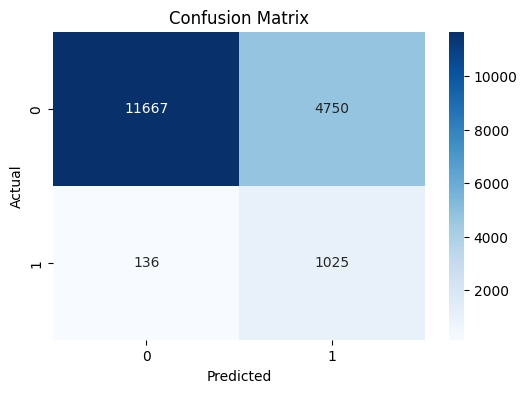

(0.5612098914689901,
 array([[11667,  4750],
        [  136,  1025]]))

In [50]:
me.evaluate_on_validation_set(model, X_val, y_val)

## 4. 📉 ROC Curve

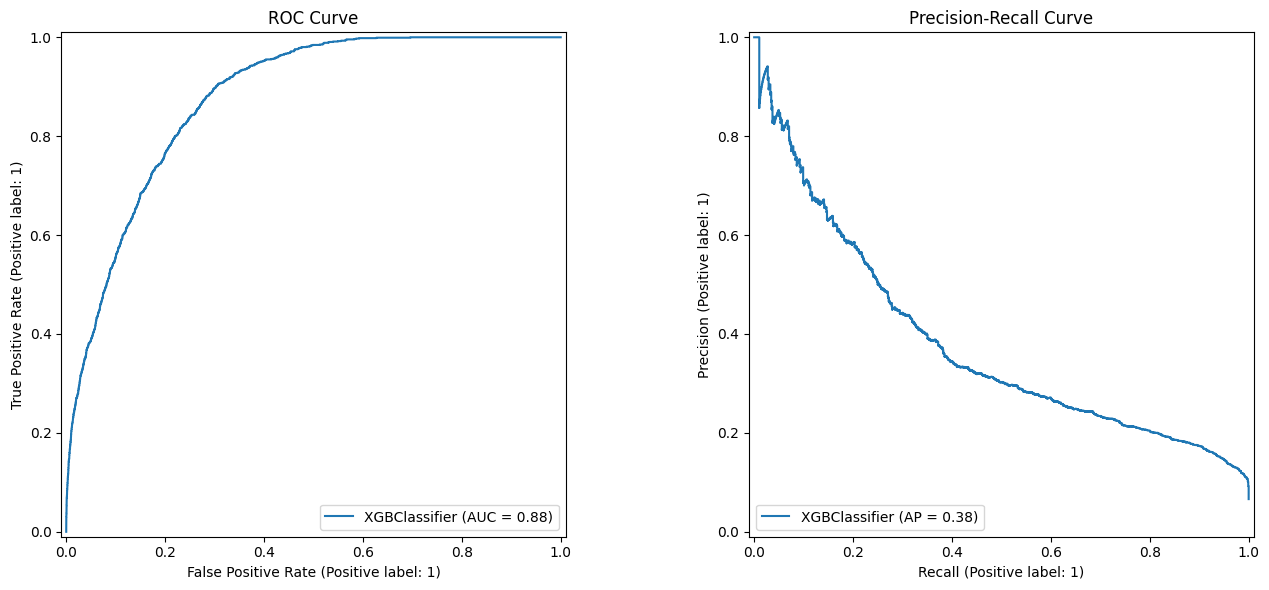

In [51]:
me.plot_roc_and_pr_curves(model, X_val, y_val)


## 5. 🎯 Hyperparameter tuning 

In [ ]:
param_grid_XG = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}
best_model = me.perform_hyperparameter_tuning(model, param_grid_XG, X_train, y_train)

Starting Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation F1-score: 0.8225


Grid Search was performed across 12 different combinations of hyperparameters.
* 5-fold cross-validation was used (i.e., your data was split into 5 parts and the model was trained and validated 5 times per parameter set).
* After evaluating 120 total model fits, the best performing parameter set was: {'depth': 9, 'iterations': 200, 'learning_rate': 0.8}
* The model using these parameters achieved a cross-validation Fi-score of 82.25% is a strong result.

## 6. ✅ Evaluate on the Validation Set


Classification Report:
              precision    recall  f1-score   support

         0.0     0.9352    0.9828    0.9584     16417
         1.0     0.1323    0.0370    0.0579      1161

    accuracy                         0.9204     17578
   macro avg     0.5338    0.5099    0.5081     17578
weighted avg     0.8822    0.9204    0.8989     17578

F1 Score (macro): 0.5081
ROC AUC Score: 0.6154
PR AUC Score: 0.0994


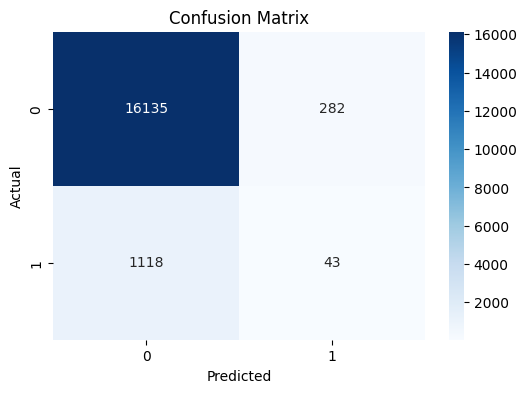

In [59]:
# Define your best parameters from GridSearch
best_params = {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}

# Retrain model
final_model = me.retrain_best_model(X_train, y_train, best_params)

# Evaluate on validation data
me.evaluate_on_validation_set(final_model, X_val, y_val)

# Optionally save the final model
with open('../models/final_XGboost_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

## 7. 📈Comparing actual values with predictions

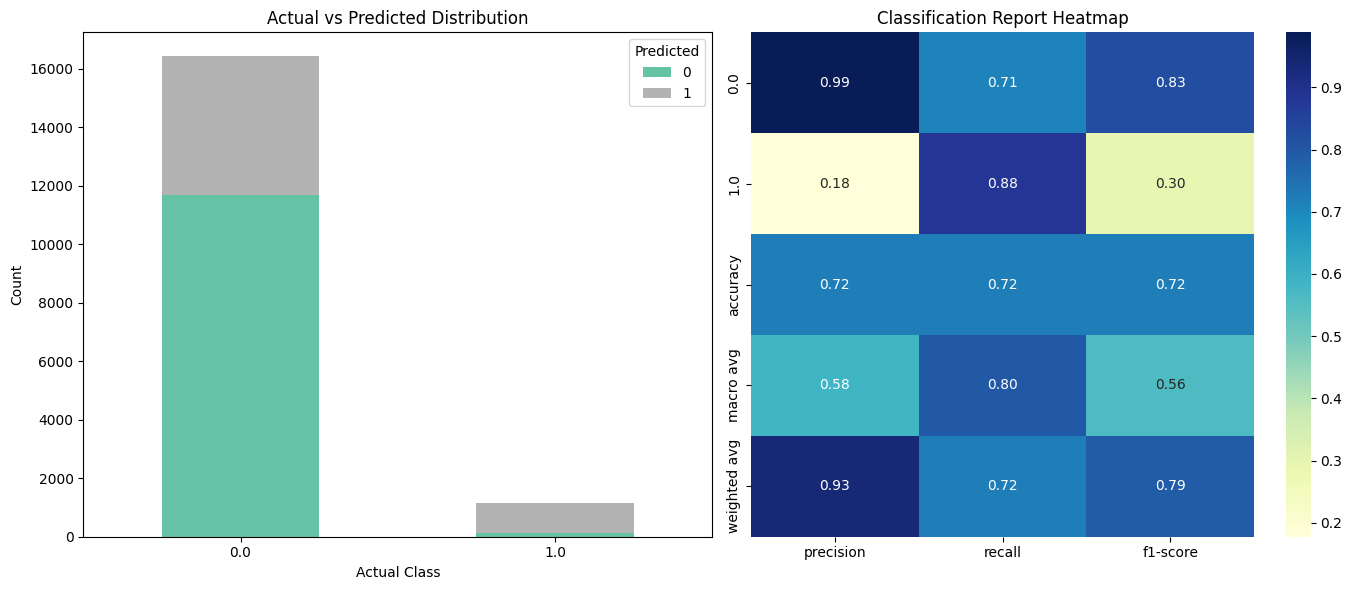

In [60]:
y_pred = model.predict(X_val)
me.plot_evaluation_summary(y_val, y_pred)


**Next Step: Model Testing**

The next step is to evaluate this tuned model on the unseen test dataset to assess its real-world performance. 